In [31]:

"""Importing the libraries"""
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy

import time


In [32]:
def mean_euclidean_error(y_true, y_pred):
    """
    mean euclidean error MEE
    """

    error = 0
    if len(y_true) == len(y_pred):
        for i in range(len(y_true)):
            error = error + np.sqrt(np.square(y_pred[i][0]
                                    - y_true[i][0])
                                    + np.square(y_pred[i][1]
                                    - y_true[i][1]))
        return error / len(y_true)

In [33]:
"""Importing the dataset"""

train_df = pd.read_csv('../data/ML-CUP20-TR .csv')
test_df = pd.read_csv('../data/ML-CUP20-TS.csv')
test_cup = pd.read_csv('../data/ML-CUP20-TS.csv')

In [25]:
"""Splitting the dataset into the Training set and Test set"""

train_x = train_df.iloc[:, :-2].to_numpy()
train_y = train_df.iloc[:, [10, 11]].to_numpy()


In [34]:
"""Splitting the dataset into the Training set and Test set"""

(x_dev, x_test, y_dev, y_test) = train_test_split(train_x, train_y,
        test_size=0.25, random_state=30)
(x_train, x_val, y_train, y_val) = train_test_split(x_dev, y_dev,
        test_size=0.25, random_state=30)

In [35]:
start = time.time()
chin_svr = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                    with_std=True)), ('estimator',
                    RegressorChain(SVR(C=10.0, cache_size=200,
                                                   coef0=0.0, degree=3,
                                                   epsilon=0.1, gamma=0.1,
                                                   kernel='rbf', max_iter=-1,
                                                   shrinking=True, tol=0.001,
                                                   verbose=False)))]).fit(x_train, y_train)
end = time.time()
print(end - start)

0.12142276763916016


In [28]:
""" Predicting the Test set results """

y_trpred =chin_svr.predict(x_train)
y_vlpred = chin_svr.predict(x_val)
y_tspred = chin_svr.predict(x_test)


In [14]:
"""  summarize performance """

print(f"Mean_euclidean_error for TR dataset :{mean_euclidean_error(y_trpred, y_train)}" )
print(f"Mean_euclidean_error for VL dataset :{mean_euclidean_error(y_vlpred, y_val)}" )
print(f"Mean_euclidean_error for TS dataset :{mean_euclidean_error(y_tspred, y_test)}" )



Mean_euclidean_error for TR dataset :2.520116334710222
Mean_euclidean_error for VL dataset :3.0821225024719787
Mean_euclidean_error for TS dataset :3.0651835463857195


In [13]:
"""Feature Scaling """
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
x_cup_test = sc_X.transform(test_cup)

Text(0, 0.5, 'Residuals Error')

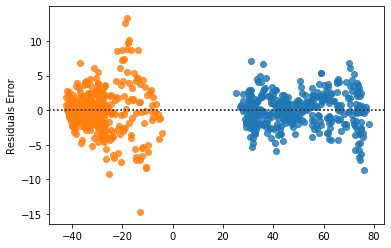

In [29]:
"""Visualising model results """
# we expect to see the result have zero mean distributed evenly around the x-axis 
sns.residplot(y_tspred[:, 0], y_test[:, 0])
sns.residplot(y_tspred[:, 1], y_test[:, 1]).set_ylabel('Residuals Error')

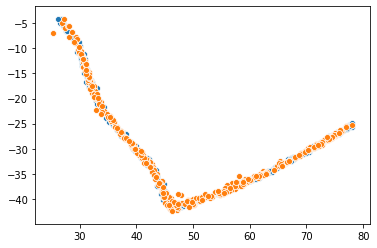

In [30]:
sns_plot = sns.scatterplot(y_test[:, 0], y_test[:, 1])
sns.scatterplot(y_tspred[:, 0], y_tspred[:, 1])


In [17]:
""" Predicting the cup test set results and dump to csv"""

y_cup = direct_svr.predict(x_cup_test)
# pd.DataFrame(y_cup).to_csv("coffee_ML-CUP20-TS.csv",header=None)


In [21]:
plt.scatterplot(y_test[:, 0], y_test[:, 1])
plt.scatterplot(y_cup[:, 0], y_cup[:, 1])

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatterplot'